<a href="https://www.kaggle.com/chandrika20/auto-csv?scriptVersionId=87888483" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/autompg-dataset/auto-mpg.csv
/kaggle/input/autocsv/Auto.csv


# Context

The data is technical spec of cars. The dataset is downloaded from UCI Machine Learning Repository

**Sources:**


Origin: This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

Date: July 7, 1993


**Past Usage:**


See 2b (above) Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.


**Relevent Information:**


This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)




**Number of Instances:**


398



**Number of Attributes:**


9 including the class attribute



**Attribute Information:**

mpg: continuous cylinders: multi-valued discrete displacement: continuous horsepower: continuous weight: continuous acceleration: continuous model year: multi-valued discrete origin: multi-valued discrete car name: string (unique for each instance)



**Missing Attribute Values:**


horsepower has 6 missing values

I used this dataset to create few machine learning models and to create logistic regression. This analysis includes EDA, Logistic Regression model,KNN model, predictive scores and errors. I used this dataset for one of my machine learning projects, I hope you will like it.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

# **Data description and cleaning the data**

In [3]:
df1 = pd.read_csv("../input/autocsv/Auto.csv")
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [5]:
df1['horsepower'] = df1['horsepower'].replace({"?":df1['horsepower'].mode()[0]})

In [6]:
df1['horsepower'] = df1['horsepower'].astype(int)

In [7]:
df1.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

# **Creating a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median*****

The classic Auto MPG Dataset and builds a model to predict the fuel efficiency of late-1970s and early 1980s automobiles.to do this, we'll provide the model with a description of many models from that time period.

This description includes attributes like: cylinders, displacement, horsepower, and weight

In [8]:
med = df1['mpg'].median()
df1['mpg01'] = df1['mpg'].apply(lambda x :1 if x > med else 0)
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


# Overall statistics with new variable mpg01

In [9]:
df1.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,105.042821,2970.261965,15.555668,75.994962,1.574307,0.481108
std,7.825804,1.701577,104.379583,38.583776,847.904119,2.749995,3.690005,0.802549,0.500273
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.000000,76.000000,2223.000000,13.800000,73.000000,1.000000,0.000000
50%,23.000000,4.000000,146.000000,95.000000,2800.000000,15.500000,76.000000,1.000000,0.000000
75%,29.000000,8.000000,262.000000,130.000000,3609.000000,17.100000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


# Visualizations

**Visualization the distribution of the features of the df1**

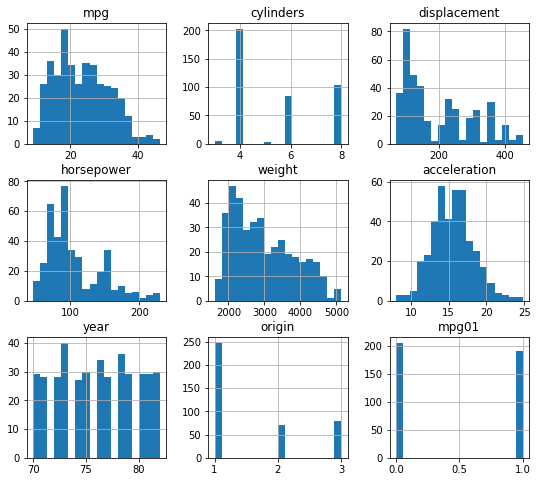

In [10]:
df1.hist(figsize=(9,8),bins=18)
plt.show()

**Comparision between relation of 'mpg01' and 'mpg': with cylinder , displacement and weight**

In [11]:
X = df1.drop('mpg01', axis = 1)
y = df1['mpg']

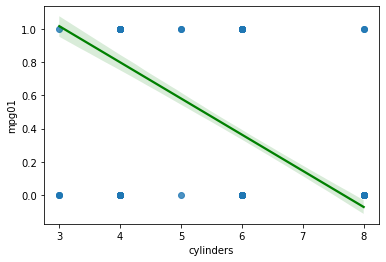

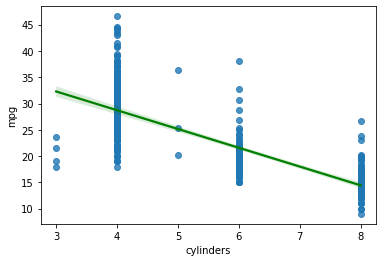

In [12]:
sns.regplot(x='cylinders', y='mpg01',data=df1, line_kws={"color": "green"})
plt.show()

sns.regplot(x='cylinders', y='mpg',data=df1, line_kws={"color": "green"})
plt.show()

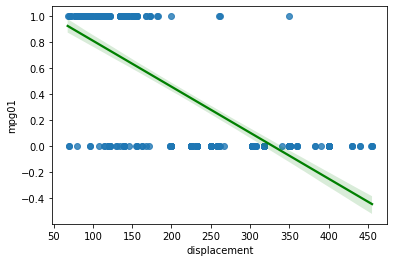

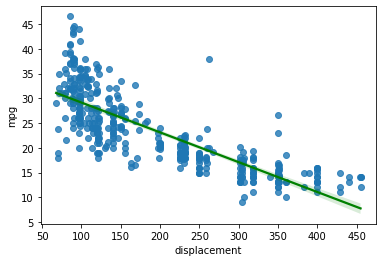

In [13]:
sns.regplot(x='displacement', y='mpg01',data=df1, line_kws={"color": "green"})
plt.show()

sns.regplot(x='displacement', y='mpg',data=df1, line_kws={"color": "green"})
plt.show()

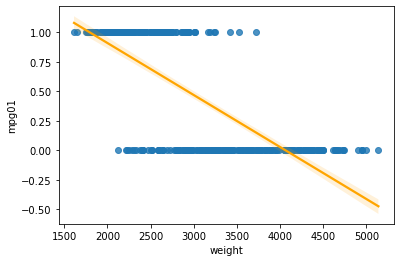

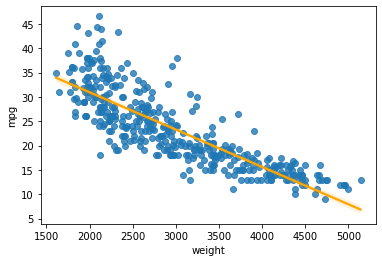

In [14]:
sns.regplot(x='weight', y='mpg01',data=df1, line_kws={"color": "orange"})
#plt.plot(scatter_kws='r')
plt.show()

sns.regplot(x='weight', y='mpg',data=df1, line_kws={"color": "orange"})
#plt.plot(scatter_kws='r')
plt.show()

**The joint distribution of a few pairs of columns from the training set : mpg01, mpg, cylinders, displacement, weight**

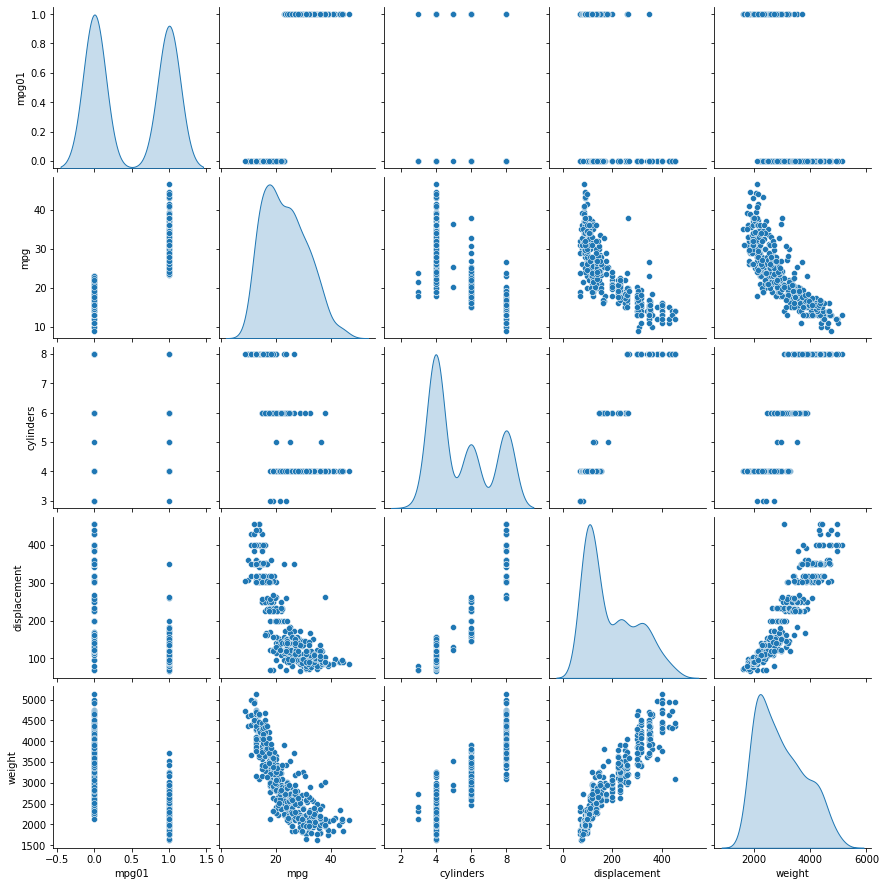

In [15]:
sns.pairplot(df1[["mpg01", "mpg", "cylinders", "displacement", "weight"]], diag_kind="kde")

The graph indicates that there exists some association between “mpg01” and “cylinders”, “weight”, “displacement” and “horsepower”.

Cylinders, displacement, weight are linearly correlated with mpg. We can apply Regression Algorithm to predict mpg

scatters seem have non linearity.. we can log transformation to make relation Linear

# Split the data into a training set and a test set

In [16]:
X = df1[['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = df1["mpg01"]
print(X)

     displacement  cylinders  horsepower  weight  acceleration  year  origin
0           307.0          8         130    3504          12.0    70       1
1           350.0          8         165    3693          11.5    70       1
2           318.0          8         150    3436          11.0    70       1
3           304.0          8         150    3433          12.0    70       1
4           302.0          8         140    3449          10.5    70       1
..            ...        ...         ...     ...           ...   ...     ...
392         140.0          4          86    2790          15.6    82       1
393          97.0          4          52    2130          24.6    82       2
394         135.0          4          84    2295          11.6    82       1
395         120.0          4          79    2625          18.6    82       1
396         119.0          4          82    2720          19.4    82       1

[397 rows x 7 columns]


***Test size: 30 %***

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Logistic Regression on the training data in order to predict mpg01 using the variables

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

**Test data set prrediction**

In [19]:
y_predict = logreg.predict(X_test)

**Test errors**

In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
error_rate = 1 - accuracy
print(f"{error_rate}")

0.15000000000000002


Logistic Regression Error Rate is: 0.17500000000000004

**Logistic Test Scores**

In [21]:
log = LogisticRegression()
log.fit(X_train, y_train)

pred_log = log.predict(X_test)

log.score(X_train, y_train)
logistic_score = round(log.score(X_train, y_train)*100,2)
logistic_score

93.5

The Logistic Regression Model score is 93.5

# Performing KNN model on the dataset

In [22]:
from sklearn.neighbors import KNeighborsClassifier
K = list(range(1,15))
error_rate2 = []
for i in K:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    
    y_predict = knn.predict(X_test)
    
    error_rate = 1 - accuracy_score(y_test, y_predict)
    error_rate2.append(error_rate)
    

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


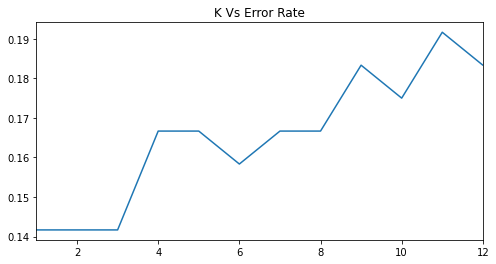

In [23]:
plt.figure(figsize = (8,4))
ax = sns.lineplot(K, error_rate2)
ax.set_xlim([1,12])
plt.title("K Vs Error Rate")
plt.show()

It is clearly visible that when K= 1, 2 and 3 the erraor rate was the lowest and constant. It suddenly increased at K=4 and then dropped and the same pattern is followed. 
Altogether the lineplot is making a zig-zag pattern. Highest error rate in the range of (1-12) can be seen by when K=9. Lowest error rate is seen when K = 1,2,3

**Scikit learn KNeighborsClassifier**

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

knn.score(X_train, y_train)
knn_score = round(knn.score(X_train, y_train)*100,2)
knn_score

100.0

The KNN model score is 100

References:
https://realpython.com/logistic-regression-python/

https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now#Logistic-regression-classifier---Undersampled-data